# ECS7026P Neural Networks and Deep Learning - 2022/23 : Coursework 1


    Name: Mohammed Ataaur Rahaman
    Student Number: 220843052
    email: m.a.rahaman@se22.qmul.ac.uk
    Assignment Number: Coursework 1
    Module Code: ECS6P9U/P/7026P
    Module Name: Neural Networks and Deep Learning 

Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

from torch import nn
from tqdm.auto import tqdm

## Data Gathering

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# transform = transforms.Compose([transforms.ToTensor()])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [4]:
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

In [5]:
testset, trainset

(Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ), Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ))

## Data Preprocessing

In [6]:
BATCH_SIZE = 32
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

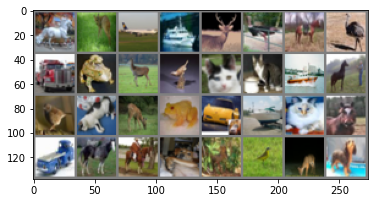

horse deer  plane ship  deer  bird  horse bird  truck frog  deer  bird  cat   cat   ship  horse bird  cat   deer  frog  car   ship  cat   horse truck horse horse dog   deer  bird  deer  dog  


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{CLASSES[labels[j]]:5s}' for j in range(BATCH_SIZE)))


## Model

In [8]:
# class LeNet(torch.nn.Module):
#     def __init__(self, num_inputs, num_outputs):
#         super(LeNet, self).__init__()
#         self.num_inputs = num_inputs
#         self.num_outputs = num_outputs
#         C1 = 6
#         C2 = 16
#         L1 = 400
#         L2 = 120
#         L3 = 84
#         self.Convl1 = nn.Conv2d(num_inputs, C1, kernel_size = 5, padding = 2)
#         self.Sigmoid = nn.Sigmoid()
#         self.Avg1 = nn.AvgPool2d(2, stride=2, padding=0)
#         self.Convl2 = nn.Conv2d(C1,C2,kernel_size = 5)
#         self.Avg2 = nn.AvgPool2d(2, stride=2, padding=0)
#         self.Fltn = nn.Flatten()
#         self.Linear1 = nn.Linear(L1, L2)
#         self.Linear2 = nn.Linear(L2, L3)
#         self.Linear3 = nn.Linear(L3, num_outputs)
#     def forward(self, x):
#         out = self.Convl1(x)
#         out = self.Sigmoid(out)
#         out = self.Avg1(out)
#         out = self.Convl2(out)
#         out = self.Sigmoid(out)
#         out = self.Avg2(out)
#         #out = self.Sigmoid(out)
#         out = self.Fltn(out)
#         out = self.Linear1(out)
#         out = self.Sigmoid(out)
#         out = self.Linear2(out)
#         out = self.Sigmoid(out)
#         out = self.Linear3(out)
#         # out = self.Sigmoid(out)
#         return out

In [9]:
K = 5
N = 2
IMG_DIM = 32
IMG_CHANNELS = 3
HIDDEN_CHANNELS = 16
HIDDEN_CONV_KERNEL = 5
STRIDE = 1

# sap = nn.AvgPool2d(kernel_size=IMG_DIM)
# linear = nn.Linear(in_features=IMG_CHANNELS, out_features=K, bias=True)

# sigmoid = nn.Sigmoid()

In [10]:
# conv2d = nn.Conv2d(in_channels=IMG_CHANNELS, out_channels=HIDDEN_CHANNELS, kernel_size=HIDDEN_CONV_KERNEL)
# conv2d

In [11]:
class Backbone(nn.Module):

  def __init__(self, img_size=IMG_DIM, in_channels=IMG_CHANNELS, out_channels=HIDDEN_CHANNELS, kernel_size=HIDDEN_CONV_KERNEL, k=K, debug=False):
    super(Backbone, self).__init__()

    # Boolean to print debug logs.
    self.debug = debug

    self.spaitial_average_pool = nn.AvgPool2d(kernel_size=img_size)
    self.linear = nn.Linear(in_features=in_channels, out_features=k, bias=True)
    self.non_linear = nn.Sigmoid()       # Non Linear Activation
    # self.non_linear = nn.ReLU()

    self.conv2ds = [
        nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size), 
            # nn.ReLU()
        ) for _ in range(k)
      ]

  def forward(self, x):
    sap_out = self.spaitial_average_pool(x).reshape(x.shape[0], -1)
    if self.debug: print(f"{sap_out.shape=}")

    lin_out = self.linear(sap_out)
    if self.debug: print(f"{lin_out.shape=}")

    g_out = self.non_linear(lin_out)
    if self.debug: print(f"{g_out.shape=}")
    if self.debug: print(f"{g_out=}")

    outs = list()
    for a, conv2d in zip(g_out.transpose(0, 1), self.conv2ds):
      c_out = conv2d(x)
      if self.debug: print(f"{c_out.shape=}")
      if self.debug: print(f"{a.shape=}, \n{a=}")

      out = a.reshape(x.shape[0], 1, 1, 1)*c_out
      if self.debug: print(f"{out.shape=}")
      outs.append(out)
      
    out = sum(outs)
    if self.debug: print(f"{out.shape=}")

    return out

  def set_device_to(self, device='cuda'):
    if 'cuda' == device and not torch.cuda.is_available():
      print(f"Cuda not available")
      return

    self.spaitial_average_pool.to(device)
    self.linear.to(device)
    self.non_linear.to(device)

    for conv2d in self.conv2ds:
      conv2d.to(device)

In [12]:
# n = 5
# channels = [IMG_CHANNELS] + [HIDDEN_CHANNELS]*(n-1)

# [IMG_DIM + (STRIDE-HIDDEN_CONV_KERNEL)*i for i in range(n)]

In [13]:
# channels

In [14]:
class Model(nn.Module):

  def __init__(self, channels, Ks, kernel_size=HIDDEN_CONV_KERNEL, k=K, n=N, debug=False):
    super(Model, self).__init__()

    # Boolean to print debug logs.
    self.debug = debug
    self.Ks = Ks
    self.channels = channels
    self.img_sizes = [IMG_DIM + (STRIDE-kernel_size)*i for i in range(n+1)]

    if self.debug: print(f"{self.channels=}")
    if self.debug: print(f"{self.img_sizes=}")
    # if self.debug: print(f"{k=}")
    if self.debug: print(f"{self.Ks=}")
    if self.debug: print(f"{n=}")

    self.backbones = [Backbone(img_size=self.img_sizes[i], in_channels=self.channels[i], out_channels=self.channels[i+1], kernel_size=kernel_size, k=self.Ks[i], debug=debug) for i in range(n)]

    self.spaitial_average_pool = nn.AvgPool2d(kernel_size=self.img_sizes[-1])
    self.linear = nn.Linear(in_features=self.channels[-1], out_features=len(CLASSES), bias=False)

  def set_debug(self, debug=True):
    self.debug = debug
    for backbone in self.backbones:
      backbone.debug = debug

  def forward(self, x):
    for backbone in self.backbones:
      x = backbone(x)
    
    f = self.spaitial_average_pool(x).reshape(x.shape[0], -1)
    if self.debug: print(f"M: {f.shape=}")

    out = self.linear(f)
    if self.debug: print(f"M: {out.shape=}")

    return out

  def set_device_to(self, device='cuda'):
    if 'cuda' == device and not torch.cuda.is_available():
      print(f"Cuda not available")
      return

    self.spaitial_average_pool.to(device)
    self.linear.to(device)
    for backbone in self.backbones:
      backbone.set_device_to(device)
      print(f"M: backbone.set_device_to(device) Device = {device}")

In [15]:
class Trainer:

  def __init__(self, model, criterion, optimizer, epochs, trainloader, testloader, log_step=100) -> None:
    self.model = model
    self.criterion = criterion
    self.optimizer = optimizer
    
    self.epochs = epochs
    self.log_step = log_step

    self.trainloader = trainloader
    self.testloader = testloader

    self.losses = list()
    self.batch_losses = list()

  def train(self):

    for epoch in range(self.epochs):  # loop over the dataset multiple times

        batch_losses = list()
        running_loss = 0.0
        for i, data in tqdm(enumerate(self.trainloader, 0), total=len(trainloader)):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            if USE_GPU:
              inputs = inputs.to('cuda')
              labels = labels.to('cuda')
            
            # zero the parameter gradients
            self.optimizer.zero_grad()

            # forward + backward + optimize
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            # print statistics
            batch_losses.append(loss.item())
            running_loss += loss.item()
            if i % self.log_step == self.log_step-1:    # print every 2000 mini-batches
                avg_loss = running_loss / self.log_step
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {avg_loss:.3f}')
                running_loss = 0.0
                self.batch_losses.append(avg_loss)

        self.losses.append(sum(batch_losses) / len(batch_losses))

        print(f"Train Loss : {self.losses[-1]}")
        self.eval()

    print('Finished Training')

  def eval(self):
    correct = 0
    total = 0
    losses = list()
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in self.testloader:
            images, labels = data
            if USE_GPU:
              images = images.to('cuda')
              labels = labels.to('cuda')

            # calculate outputs by running images through the network
            outputs = self.model(images)

            loss = self.criterion(outputs, labels)
            losses.append(loss.item())

            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Val Loss : {sum(losses) / len(losses)}")
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    
  def plot(self):
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(self.losses)
    ax2.plot(self.batch_losses)
    fig.show()


In [25]:
# Init model

IMG_DIM = 32
IMG_CHANNELS = 3


K = 5
# HIDDEN_CHANNELS = 16
HIDDEN_CONV_KERNEL = 5
STRIDE = 1

channels = [IMG_CHANNELS, 16, 32, 64, 128] #20, 25, 30]
Ks = [5, 5, 5, 5, 5, 5, 5, 5]
N = len(channels) - 1

model = Model(
    Ks=Ks,
    channels=channels,
    kernel_size=HIDDEN_CONV_KERNEL, 
    k=K, 
    n=N, 
    debug=True
)
model

self.channels=[3, 16, 32, 64, 128]
self.img_sizes=[32, 28, 24, 20, 16]
self.Ks=[5, 5, 5, 5, 5, 5, 5, 5]
n=4


Model(
  (spaitial_average_pool): AvgPool2d(kernel_size=16, stride=16, padding=0)
  (linear): Linear(in_features=128, out_features=10, bias=False)
)

In [26]:
model.backbones[0].conv2ds

[Sequential(
   (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
 ), Sequential(
   (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
 ), Sequential(
   (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
 ), Sequential(
   (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
 ), Sequential(
   (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
 )]

In [27]:
# def init_weights(m):
#     if type(m) == nn.Linear or type(m) == nn.Conv2d: # by checking the type we can init different layers in different ways
#         torch.nn.init.xavier_uniform_(m.weight)          

# num_outputs = 10
# #model = LeNet(num_outputs)
# model.apply(init_weights);
# print(model)

In [28]:
# Init optimizer 

LR = 0.001 #1e-2
MOMENTUM = 0.9 #0.9
USE_GPU = True


criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

model.set_debug(False)
if USE_GPU: model.set_device_to('cuda')

M: backbone.set_device_to(device) Device = cuda
M: backbone.set_device_to(device) Device = cuda
M: backbone.set_device_to(device) Device = cuda
M: backbone.set_device_to(device) Device = cuda


In [29]:
# Init Trainer

EPOCHS = 3
BATCH_SIZE = 64

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)


trainer = Trainer(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer, 
    epochs=EPOCHS, 
    log_step=200,
    trainloader=trainloader,
    testloader=testloader,
)

  0%|          | 0/782 [00:00<?, ?it/s]

[1,   200] loss: 2.214
[1,   400] loss: 2.138
[1,   600] loss: 2.091
Train Loss : 2.128501130186993
Val Loss : 2.050461423624853
Accuracy of the network on the 10000 test images: 26 %


  0%|          | 0/782 [00:00<?, ?it/s]

[2,   200] loss: 2.045
[2,   400] loss: 2.035
[2,   600] loss: 2.030
Train Loss : 2.034242374055526
Val Loss : 2.0094347675894477
Accuracy of the network on the 10000 test images: 27 %


  0%|          | 0/782 [00:00<?, ?it/s]

[3,   200] loss: 2.019
[3,   400] loss: 2.007
[3,   600] loss: 2.007
Train Loss : 2.0088809891734893
Val Loss : 1.9924904776226944
Accuracy of the network on the 10000 test images: 28 %


  0%|          | 0/782 [00:00<?, ?it/s]

[4,   200] loss: 1.996
[4,   400] loss: 1.996
[4,   600] loss: 1.998
Train Loss : 1.9962167726148425
Val Loss : 1.9821483489054783
Accuracy of the network on the 10000 test images: 28 %


  0%|          | 0/782 [00:00<?, ?it/s]

[5,   200] loss: 1.995
[5,   400] loss: 1.983
[5,   600] loss: 1.988
Train Loss : 1.987750287708419
Val Loss : 1.975441373837222
Accuracy of the network on the 10000 test images: 29 %


  0%|          | 0/782 [00:00<?, ?it/s]

[6,   200] loss: 1.981
[6,   400] loss: 1.980
[6,   600] loss: 1.983
Train Loss : 1.9818905247446825
Val Loss : 1.969584584236145
Accuracy of the network on the 10000 test images: 29 %


  0%|          | 0/782 [00:00<?, ?it/s]

[7,   200] loss: 1.979
[7,   400] loss: 1.974
[7,   600] loss: 1.975
Train Loss : 1.9770476293685797
Val Loss : 1.9648264623751306
Accuracy of the network on the 10000 test images: 29 %


  0%|          | 0/782 [00:00<?, ?it/s]

[8,   200] loss: 1.974
[8,   400] loss: 1.972
[8,   600] loss: 1.973
Train Loss : 1.9725012488072486
Val Loss : 1.9612131779360924
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[9,   200] loss: 1.962
[9,   400] loss: 1.961
[9,   600] loss: 1.974
Train Loss : 1.9692076679385837
Val Loss : 1.9590271096320668
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[10,   200] loss: 1.970
[10,   400] loss: 1.966
[10,   600] loss: 1.963
Train Loss : 1.9662186364688532
Val Loss : 1.9547126984140675
Accuracy of the network on the 10000 test images: 29 %


  0%|          | 0/782 [00:00<?, ?it/s]

[11,   200] loss: 1.958
[11,   400] loss: 1.962
[11,   600] loss: 1.966
Train Loss : 1.963922069658099
Val Loss : 1.9525290363153833
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[12,   200] loss: 1.967
[12,   400] loss: 1.959
[12,   600] loss: 1.961
Train Loss : 1.9614473747475374
Val Loss : 1.951159616944137
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[13,   200] loss: 1.955
[13,   400] loss: 1.961
[13,   600] loss: 1.967
Train Loss : 1.9594834782278445
Val Loss : 1.9488132372023954
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[14,   200] loss: 1.958
[14,   400] loss: 1.960
[14,   600] loss: 1.969
Train Loss : 1.9575186960227655
Val Loss : 1.9460906648332146
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[15,   200] loss: 1.954
[15,   400] loss: 1.965
[15,   600] loss: 1.949
Train Loss : 1.9554415762881794
Val Loss : 1.9454863648505727
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[16,   200] loss: 1.956
[16,   400] loss: 1.944
[16,   600] loss: 1.964
Train Loss : 1.9540128218548378
Val Loss : 1.9434218285190072
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[17,   200] loss: 1.958
[17,   400] loss: 1.964
[17,   600] loss: 1.943
Train Loss : 1.9523757897374574
Val Loss : 1.9412530842860034
Accuracy of the network on the 10000 test images: 30 %


  0%|          | 0/782 [00:00<?, ?it/s]

[18,   200] loss: 1.954
[18,   400] loss: 1.958
[18,   600] loss: 1.954
Train Loss : 1.9507532167007855
Val Loss : 1.9401187099468935
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[19,   200] loss: 1.950
[19,   400] loss: 1.943
[19,   600] loss: 1.953
Train Loss : 1.9496062769914222
Val Loss : 1.9389714951727801
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[20,   200] loss: 1.943
[20,   400] loss: 1.949
[20,   600] loss: 1.948
Train Loss : 1.9482375288863316
Val Loss : 1.9371336926320555
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[21,   200] loss: 1.945
[21,   400] loss: 1.938
[21,   600] loss: 1.955
Train Loss : 1.9471738451277203
Val Loss : 1.9362248789732623
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[22,   200] loss: 1.945
[22,   400] loss: 1.947
[22,   600] loss: 1.949
Train Loss : 1.9458057654788121
Val Loss : 1.935869593529185
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[23,   200] loss: 1.941
[23,   400] loss: 1.937
[23,   600] loss: 1.945
Train Loss : 1.944562503291518
Val Loss : 1.9346729091777923
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[24,   200] loss: 1.933
[24,   400] loss: 1.942
[24,   600] loss: 1.957
Train Loss : 1.9435959548291648
Val Loss : 1.9328922405364408
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[25,   200] loss: 1.938
[25,   400] loss: 1.950
[25,   600] loss: 1.939
Train Loss : 1.9427728473073076
Val Loss : 1.9320415934179997
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[26,   200] loss: 1.939
[26,   400] loss: 1.940
[26,   600] loss: 1.942
Train Loss : 1.9410938274525011
Val Loss : 1.9314255106980633
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[27,   200] loss: 1.940
[27,   400] loss: 1.943
[27,   600] loss: 1.939
Train Loss : 1.9403865787074388
Val Loss : 1.9297959265435578
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[28,   200] loss: 1.940
[28,   400] loss: 1.934
[28,   600] loss: 1.938
Train Loss : 1.939456596551344
Val Loss : 1.928783116067291
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[29,   200] loss: 1.933
[29,   400] loss: 1.926
[29,   600] loss: 1.937
Train Loss : 1.9384000490388602
Val Loss : 1.9280454626508579
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[30,   200] loss: 1.934
[30,   400] loss: 1.927
[30,   600] loss: 1.943
Train Loss : 1.9374768483974134
Val Loss : 1.927035969533738
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[31,   200] loss: 1.938
[31,   400] loss: 1.944
[31,   600] loss: 1.931
Train Loss : 1.9363057310014125
Val Loss : 1.9265240924373555
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[32,   200] loss: 1.939
[32,   400] loss: 1.934
[32,   600] loss: 1.941
Train Loss : 1.9359204442909612
Val Loss : 1.9254293760676293
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[33,   200] loss: 1.939
[33,   400] loss: 1.937
[33,   600] loss: 1.928
Train Loss : 1.9350333922659344
Val Loss : 1.9243901800957455
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[34,   200] loss: 1.938
[34,   400] loss: 1.937
[34,   600] loss: 1.928
Train Loss : 1.9341939266990213
Val Loss : 1.9251205928766044
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[35,   200] loss: 1.923
[35,   400] loss: 1.942
[35,   600] loss: 1.937
Train Loss : 1.9332687485858302
Val Loss : 1.9230882179964879
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[36,   200] loss: 1.926
[36,   400] loss: 1.932
[36,   600] loss: 1.931
Train Loss : 1.933095816303702
Val Loss : 1.9220622800717688
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[37,   200] loss: 1.929
[37,   400] loss: 1.924
[37,   600] loss: 1.941
Train Loss : 1.9314011794221981
Val Loss : 1.9223188290930098
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[38,   200] loss: 1.922
[38,   400] loss: 1.934
[38,   600] loss: 1.940
Train Loss : 1.9313556143389943
Val Loss : 1.9211579690313643
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[39,   200] loss: 1.935
[39,   400] loss: 1.931
[39,   600] loss: 1.920
Train Loss : 1.9306042689801481
Val Loss : 1.9205816612122164
Accuracy of the network on the 10000 test images: 31 %


  0%|          | 0/782 [00:00<?, ?it/s]

[40,   200] loss: 1.930
[40,   400] loss: 1.934
[40,   600] loss: 1.927
Train Loss : 1.929640756848523
Val Loss : 1.9198748397219711
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[41,   200] loss: 1.934
[41,   400] loss: 1.930
[41,   600] loss: 1.924
Train Loss : 1.9288593109916239
Val Loss : 1.9191088182910991
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[42,   200] loss: 1.929
[42,   400] loss: 1.926
[42,   600] loss: 1.931
Train Loss : 1.9283054917669662
Val Loss : 1.9184355302980751
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[43,   200] loss: 1.934
[43,   400] loss: 1.928
[43,   600] loss: 1.922
Train Loss : 1.927692641382632
Val Loss : 1.9179600537962216
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[44,   200] loss: 1.929
[44,   400] loss: 1.924
[44,   600] loss: 1.932
Train Loss : 1.9267618979334526
Val Loss : 1.9170934493374672
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[45,   200] loss: 1.920
[45,   400] loss: 1.932
[45,   600] loss: 1.921
Train Loss : 1.9262775716269414
Val Loss : 1.9163294939478492
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[46,   200] loss: 1.921
[46,   400] loss: 1.935
[46,   600] loss: 1.925
Train Loss : 1.9256870505754904
Val Loss : 1.915820275142694
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[47,   200] loss: 1.914
[47,   400] loss: 1.933
[47,   600] loss: 1.929
Train Loss : 1.9249134089635767
Val Loss : 1.915028935784747
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[48,   200] loss: 1.928
[48,   400] loss: 1.921
[48,   600] loss: 1.927
Train Loss : 1.9245542089652528
Val Loss : 1.9152507850318958
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[49,   200] loss: 1.927
[49,   400] loss: 1.929
[49,   600] loss: 1.924
Train Loss : 1.92405859481953
Val Loss : 1.9140247850661065
Accuracy of the network on the 10000 test images: 32 %


  0%|          | 0/782 [00:00<?, ?it/s]

[50,   200] loss: 1.922
[50,   400] loss: 1.922
[50,   600] loss: 1.923
Train Loss : 1.923148255214057
Val Loss : 1.91382934409342
Accuracy of the network on the 10000 test images: 32 %
Finished Training
trainer.losses[-1]=1.923148255214057
Val Loss : 1.91382934409342
Accuracy of the network on the 10000 test images: 32 %


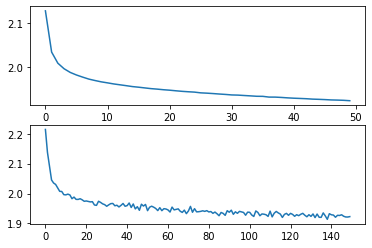

In [30]:
trainer.epochs = 50

trainer.train()
print(f"{trainer.losses[-1]=}")
trainer.plot()
trainer.eval()

In [ ]:
plt.plot(trainer.losses)

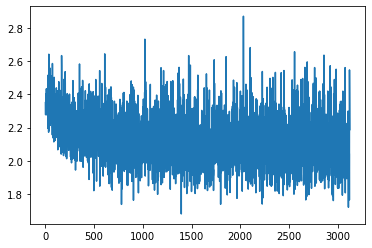

In [103]:
trainer.plot()

In [63]:
log_step = 100

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        if USE_GPU:
          inputs = inputs.to('cuda')
          labels = labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % log_step == log_step-1:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / log_step:.3f}')
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/12500 [00:00<?, ?it/s]

[1,   100] loss: 2.768
[1,   200] loss: 3.014
[1,   300] loss: 2.915
[1,   400] loss: 2.666
[1,   500] loss: 2.793
[1,   600] loss: 2.831
[1,   700] loss: 2.637
[1,   800] loss: 2.641
[1,   900] loss: 2.888
[1,  1000] loss: 2.831
[1,  1100] loss: 2.605
[1,  1200] loss: 2.653
[1,  1300] loss: 2.747
[1,  1400] loss: 2.968
[1,  1500] loss: 2.802
[1,  1600] loss: 2.817
[1,  1700] loss: 2.950
[1,  1800] loss: 2.750
[1,  1900] loss: 2.765
[1,  2000] loss: 2.617
[1,  2100] loss: 2.651
[1,  2200] loss: 2.627
[1,  2300] loss: 2.623
[1,  2400] loss: 2.807
[1,  2500] loss: 2.796
[1,  2600] loss: 2.800
[1,  2700] loss: 2.717
[1,  2800] loss: 2.854
[1,  2900] loss: 2.668
[1,  3000] loss: 2.597
[1,  3100] loss: 2.653
[1,  3200] loss: 2.806
[1,  3300] loss: 2.590
[1,  3400] loss: 2.685
[1,  3500] loss: 2.804
[1,  3600] loss: 2.656
[1,  3700] loss: 2.742
[1,  3800] loss: 2.877
[1,  3900] loss: 2.763
[1,  4000] loss: 2.832
[1,  4100] loss: 2.846
[1,  4200] loss: 2.636
[1,  4300] loss: 2.935
[1,  4400] 

In [64]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if USE_GPU:
          images = images.to('cuda')
          labels = labels.to('cuda')

        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 22 %


In [230]:
for X, y in trainloader:
  out = model(X)
  break

sap_out.shape=torch.Size([4, 3])
lin_out.shape=torch.Size([4, 5])
g_out.shape=torch.Size([4, 5])
g_out=tensor([[0.5469, 0.4594, 0.6378, 0.6490, 0.3641],
        [0.5344, 0.4351, 0.6494, 0.6619, 0.3571],
        [0.5595, 0.4176, 0.6483, 0.6484, 0.3586],
        [0.5600, 0.4134, 0.6506, 0.6497, 0.3568]], grad_fn=<SigmoidBackward0>)
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.5469, 0.5344, 0.5595, 0.5600], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.4594, 0.4351, 0.4176, 0.4134], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.6378, 0.6494, 0.6483, 0.6506], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.6490, 0.6619, 0.6484, 0.6497], grad_fn=<UnbindBackward0>)
out.shape=

In [160]:
sap = nn.AvgPool2d(kernel_size=28)
linear = nn.Linear(in_features=16, out_features=10, bias=True)
linear

Linear(in_features=16, out_features=10, bias=True)

In [161]:
sap_out = sap(out).reshape(BATCH_SIZE, -1)
print(f"{sap_out.shape=}")

out = linear(sap_out)
print(f"{out.shape=}")

sap_out.shape=torch.Size([4, 16])
out.shape=torch.Size([4, 10])


In [154]:
out.shape

torch.Size([4, 16, 28, 28])

In [131]:
for X, y in trainloader:
  print(f"{X.shape=}")

  sap_out = sap(X).reshape(BATCH_SIZE, -1)
  print(f"{sap_out.shape=}")

  lin_out = linear(sap_out)
  print(f"{lin_out.shape=}")

  g_out = sigmoid(lin_out)
  print(f"{g_out.shape=}")
  print(f"{g_out=}")

  conv2ds = list()
  for i in range(K):
    conv2d = nn.Conv2d(in_channels=IMG_CHANNELS, out_channels=HIDDEN_CHANNELS, kernel_size=HIDDEN_CONV_KERNEL)
    conv2ds.append(conv2d)

  outs = list()
  for a, conv2d in zip(g_out.transpose(0, 1), conv2ds):
    c_out = conv2d(X)
    print(f"{c_out.shape=}")
    print(f"{a.shape=}, \n{a=}")

    out = a.reshape(4, 1, 1, 1)*c_out
    print(f"{out.shape=}")
    outs.append(out)
    
  out = sum(outs)
  print(f"{out.shape=}")
  break

X.shape=torch.Size([4, 3, 32, 32])
sap_out.shape=torch.Size([4, 3])
lin_out.shape=torch.Size([4, 5])
g_out.shape=torch.Size([4, 5])
g_out=tensor([[0.6158, 0.4734, 0.4574, 0.3917, 0.4462],
        [0.6017, 0.5205, 0.4572, 0.3841, 0.4627],
        [0.6050, 0.5056, 0.4546, 0.3865, 0.4573],
        [0.6161, 0.4672, 0.4287, 0.4068, 0.4293]], grad_fn=<SigmoidBackward0>)
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.6158, 0.6017, 0.6050, 0.6161], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.4734, 0.5205, 0.5056, 0.4672], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.4574, 0.4572, 0.4546, 0.4287], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.3917, 0.3841, 0.3865, 0.4068], gr

In [134]:
len(outs)

5

In [145]:
out[0][1][1][1]

tensor(-0.0531, grad_fn=<SelectBackward0>)

In [146]:
o = 0

for i in range(len(outs)):
  o += outs[i][0][1][1][1] 

o

tensor(-0.0531, grad_fn=<AddBackward0>)

In [111]:
(a.reshape(BATCH_SIZE, 1, 1, 1)*c_out).shape

torch.Size([4, 16, 28, 28])

In [127]:
(a.reshape(4, 1, 1, 1)*c_out)[1][1][10]

tensor([ 0.0285,  0.0197, -0.0103, -0.0060, -0.0005,  0.0115,  0.0123,  0.0011,
        -0.0217, -0.0369, -0.0204, -0.0083, -0.0108, -0.0173, -0.0185, -0.0025,
         0.0095, -0.0113, -0.0094,  0.0035, -0.0033, -0.0072, -0.0165, -0.0155,
         0.0048, -0.0135, -0.0214,  0.0189], grad_fn=<SelectBackward0>)

In [128]:
c_out[1][1][10]

tensor([ 0.0666,  0.0460, -0.0241, -0.0139, -0.0011,  0.0268,  0.0287,  0.0026,
        -0.0508, -0.0863, -0.0476, -0.0195, -0.0252, -0.0405, -0.0434, -0.0058,
         0.0222, -0.0264, -0.0221,  0.0083, -0.0077, -0.0168, -0.0387, -0.0362,
         0.0111, -0.0315, -0.0501,  0.0443], grad_fn=<SelectBackward0>)

In [130]:
0.4277*0.0666

0.028484820000000004